<a href="https://colab.research.google.com/github/Svetorus/Computer_vision/blob/master/DP_HW_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

#### Загрузка и подготовка датасета CIFAR-10

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.reshape(-1, 32, 32, 3).astype(np.float32) / 255.
test_images = test_images.reshape(-1, 32, 32, 3).astype(np.float32) / 255.

print(train_images.shape, train_images.dtype)
print(test_images.shape, test_images.dtype)
print(train_labels.shape, train_labels.dtype)
print(test_labels.shape, test_labels.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) uint8
(10000, 1) uint8


Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Airplane</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Automobile</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Bird</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Cat</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Deer</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Dog</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Frog</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Horse</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Ship</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Truck</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [0]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Посмотрим первые 25 изображений:

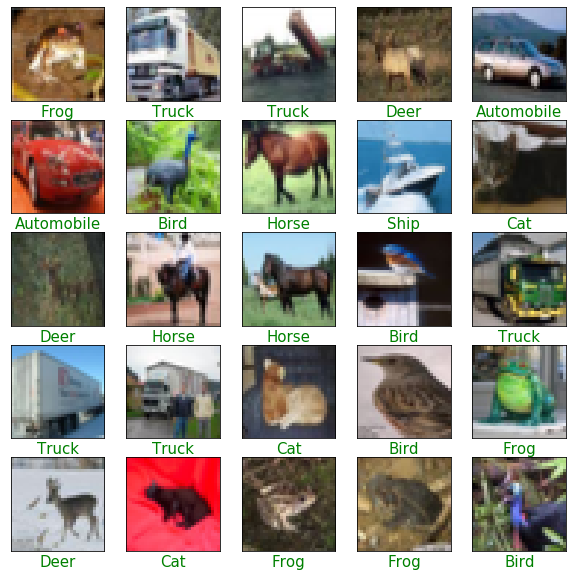

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]],fontsize=15,color='g')

#### Создание модели CNN

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(192, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### Подготовка к обучению

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Обучение модели

In [0]:
EPOCHS = 10
# batch_size = 30
model.fit(train_images, train_labels, epochs=EPOCHS)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 172s 3ms/sample - loss: 1.5037 - accuracy: 0.4556
Epoch 2/10
50000/50000 [==============================] - 167s 3ms/sample - loss: 1.1582 - accuracy: 0.5883
Epoch 3/10
50000/50000 [==============================] - 163s 3ms/sample - loss: 1.0232 - accuracy: 0.6376
Epoch 4/10
50000/50000 [==============================] - 168s 3ms/sample - loss: 0.9139 - accuracy: 0.6769
Epoch 5/10
50000/50000 [==============================] - 169s 3ms/sample - loss: 0.8413 - accuracy: 0.7018
Epoch 6/10
50000/50000 [==============================] - 180s 4ms/sample - loss: 0.7825 - accuracy: 0.7256
Epoch 7/10
50000/50000 [==============================] - 185s 4ms/sample - loss: 0.7294 - accuracy: 0.7452
Epoch 8/10
50000/50000 [==============================] - 182s 4ms/sample - loss: 0.6789 - accuracy: 0.7612
Epoch 9/10
50000/50000 [==============================] - 178s 4ms/sample - loss: 0.6437 - accuracy: 0.7741
Epoch

#### Оценка качества модели

In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.8256 - accuracy: 0.7291


[0.8256355233192444, 0.7291]

#### Проверка предсказаний

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

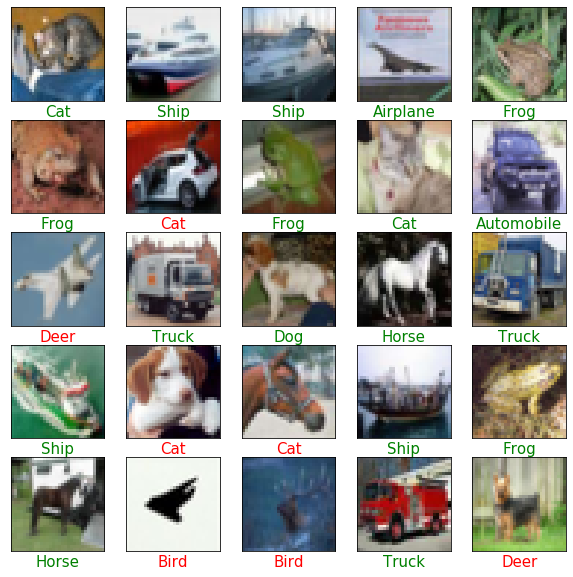

In [0]:
# Вывод нескольких картинок 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    if class_names[np.argmax(predictions[i])] == class_names[test_labels[i][0]]:
        plt.xlabel(class_names[np.argmax(predictions[i])],color='g',fontsize=15)
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])],color='r',fontsize=15)

#### Функции для вывода изображений

In [0]:
# Функция вывода катринки с проверкой предсказания  
def picture(i, predictions_array, true_label, img):
    if class_names[np.argmax(predictions_array)] == class_names[true_label]:
        plt.imshow(img)
        plt.xlabel(class_names[np.argmax(predictions_array)],color='g',fontsize=15)
        plt.ylabel('Correct',color='g',fontsize=15)
    else:
        plt.imshow(img)
        plt.xlabel(class_names[np.argmax(predictions_array)],color='r',fontsize=15)
        plt.ylabel('False',color='r',fontsize=15)
# Функция для графического предсказания с цифрами
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
#    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    if class_names[np.argmax(predictions[i])] == class_names[true_label]:
        thisplot[predicted_label].set_color('g')
    else:
        thisplot[predicted_label].set_color('r')
        thisplot[true_label].set_color('g')
        
# Функция вывода графического предсказания с расшифровкой цифр       
def image(i,predic,label):
    thisplot = plt.bar(range(10), predic, color="#777777")
    predicted_label = np.argmax(predic)
    if class_names[predicted_label] == class_names[label]:
        thisplot[predicted_label].set_color('g')
        plt.xticks(range(10), class_names, rotation=45)
    else:
        thisplot[predicted_label].set_color('r')
        thisplot[label].set_color('g')
        plt.xticks(range(10), class_names, rotation=45)

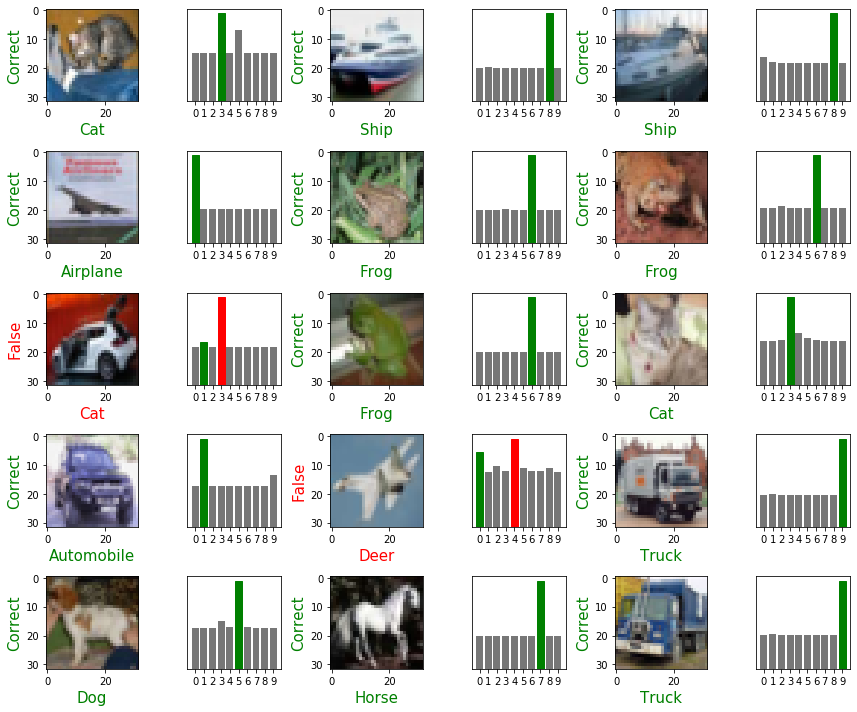

In [0]:
# Вывод картинок и графического предсказания
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_images[i])
    if class_names[np.argmax(predictions[i])] == class_names[test_labels[i][0]]:
        plt.xlabel(class_names[np.argmax(predictions[i])],color='g',fontsize=15)
        plt.ylabel('Correct',color='g',fontsize=15)
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])],color='r',fontsize=15)
        plt.ylabel('False',color='r',fontsize=15)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels[i][0])# функция "plot_value_array"
plt.tight_layout()

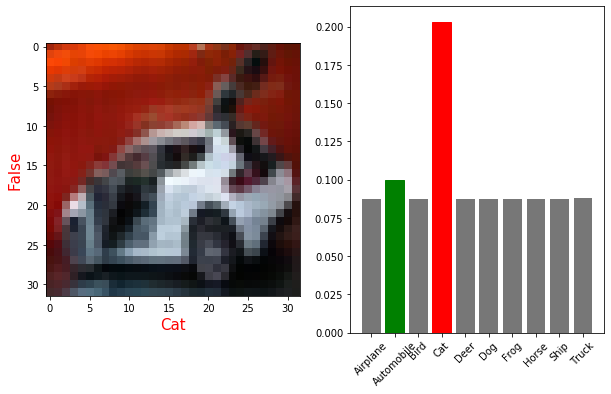

In [0]:
# Вывод картинки и графического предсказания с расшифровкой цифр
i = 6 # номер картинки
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
picture(i, predictions[i], test_labels[i][0], test_images[i]) # функция "picture"
plt.subplot(1,2,2)
image(i,predictions[i],test_labels[i][0])# функция "image"

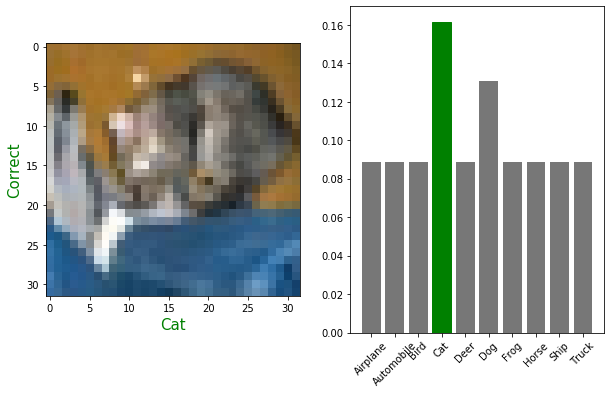

In [0]:
# Вывод картинки и графического предсказания с расшифровкой цифр
i = 0 # номер картинки
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
picture(i, predictions[i], test_labels[i][0], test_images[i])
plt.subplot(1,2,2)
image(i,predictions[i],test_labels[i][0])

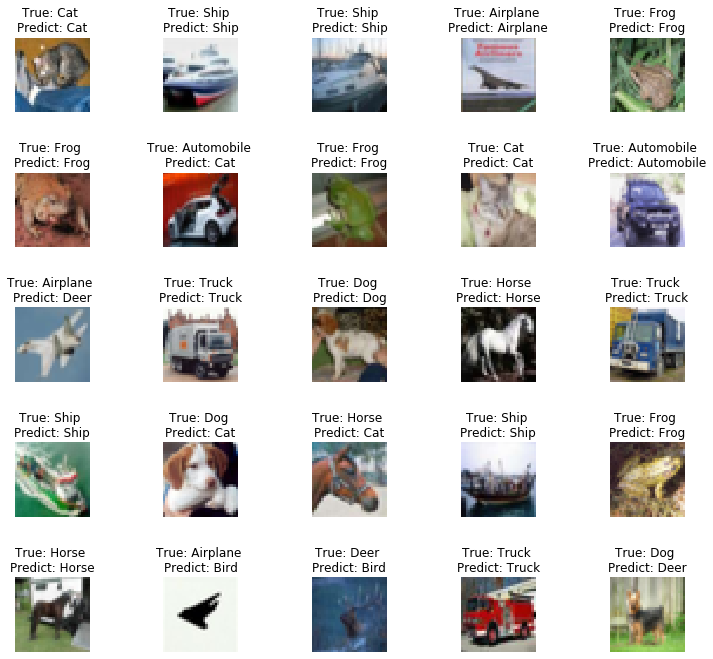

In [0]:
# Вывод нескольких картинок c верным и предсказанным названием картинки
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[test_labels[i][0]], class_names[np.argmax(predictions[i])]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)